# Prä-EDA mit Mini-Datensatz

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Lege Darstellungsoptionen, Warnungsunterdrückungen etc. fest
pd.set_option('display.float_format', '{:,.2f}'.format)

In [ ]:
# get data and create df
file_path = "/Users/mareikekeller/air_quality/data/waqi-covid19-airqualitydata-2025.csv"
df = pd.read_csv(file_path, comment="#")


In [4]:
df

,Date,Country,City,Specie,count,min,max,median,variance
0,2024-12-16,PE,Lima,o3,120,0.40,20.20,1.70,107.87
1,2025-01-04,PE,Lima,o3,192,0.30,29.90,2.60,352.15
2,2024-02-06,PE,Lima,o3,167,0.80,15.60,4.90,91.98
3,2024-04-19,PE,Lima,o3,144,0.80,11.30,5.40,101.73
4,2024-08-15,PE,Lima,o3,97,1.10,13.70,2.80,62.46
...,...,...,...,...,...,...,...,...,...
2321067,2024-03-19,IQ,Baghdad,wind-gust,2,13.80,14.90,13.80,6.05
2321068,2024-04-09,IQ,Baghdad,wind-gust,2,15.90,18.00,15.90,22.05
2321069,2024-06-25,IQ,Baghdad,wind-gust,2,9.70,10.80,9.70,6.05
2321070,2024-12-27,IQ,Baghdad,wind-gust,2,16.40,19.00,16.40,33.80


In [5]:
# Select five cities for mini EDA and create a new DataFrame with only these cities

mask_top_five_cities = (df['City'] == "Abu Dhabi") | (df['City'] == "Buenos Aires") | (df['City'] == "Vienna") | (df['City'] == "Brisbane") | (df['City'] == "Sarajevo")
df_top_five_cities = df[mask_top_five_cities]

In [6]:
# Create a pivot table with the median value of each specie for each city and date
df_top_five_cities_pivot = df_top_five_cities.pivot(index=["Date", "Country", "City"], columns="Specie", values="median").reset_index()
df_top_five_cities_pivot.columns = [''.join(col).strip('_') for col in df_top_five_cities_pivot.columns]
df_top_five_cities_pivot

,Date,Country,City,co,dew,humidity,no2,o3,pm10,pm25,precipitation,pressure,so2,temperature,wd,wind-gust,wind-speed
0,2024-01-01,AE,Abu Dhabi,0.10,19.00,73.00,8.10,21.20,50.00,53.00,NaN,"1,017.00",4.20,24.00,NaN,NaN,3.00
1,2024-01-01,AR,Buenos Aires,1.90,15.80,63.00,4.60,12.20,14.00,34.00,99.00,"1,011.50",2.60,24.20,67.50,9.10,3.30
2,2024-01-01,AT,Vienna,0.10,1.90,72.70,4.20,NaN,6.00,17.00,99.20,993.20,1.10,6.50,NaN,9.30,4.00
3,2024-01-01,AU,Brisbane,1.50,20.40,87.00,1.90,10.60,9.00,15.00,1.80,"1,016.70",0.60,22.30,166.00,10.00,1.50
4,2024-01-01,BA,Sarajevo,1.60,6.00,96.50,15.60,25.20,21.00,76.00,0.20,"1,013.00",6.10,7.00,NaN,6.10,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,2025-02-17,AR,Buenos Aires,NaN,19.40,87.90,NaN,NaN,NaN,NaN,NaN,"1,006.20",NaN,22.10,NaN,NaN,1.50
2053,2025-02-17,AT,Vienna,0.10,-9.00,70.20,9.60,NaN,26.00,76.00,NaN,"1,025.20",1.60,-2.50,NaN,4.00,2.00
2054,2025-02-17,AU,Brisbane,0.70,16.40,58.50,2.30,8.60,23.00,27.00,NaN,"1,013.70",1.10,24.30,128.00,8.10,2.50
2055,2025-02-17,BA,Sarajevo,3.70,-4.00,86.00,12.40,15.60,31.00,91.00,NaN,"1,019.00",20.30,-1.00,NaN,NaN,3.00


In [ ]:
# Set variable for EDA-df and look at the data
df_eda = df_top_five_cities_pivot.copy()
df_eda.sample(20)

,Date,Country,City,co,dew,humidity,no2,o3,pm10,pm25,precipitation,pressure,so2,temperature,wd,wind-gust,wind-speed
676,2024-05-15,BA,Sarajevo,0.8,11.2,90.0,6.0,32.1,12.0,42.0,99.6,1013.0,3.1,15.0,NaN,NaN,1.0
1166,2024-08-23,AT,Vienna,0.1,13.1,62.0,8.7,NaN,16.0,34.0,99.0,994.7,1.6,23.1,NaN,3.2,1.2
383,2024-03-17,AU,Brisbane,1.2,21.0,78.1,1.9,5.7,9.0,15.0,1.4,1012.6,0.6,22.9,140.0,6.7,1.6
1051,2024-07-31,AT,Vienna,0.1,10.1,48.5,7.8,NaN,19.0,30.0,99.0,1014.8,1.6,25.9,NaN,3.7,1.7
476,2024-04-05,AR,Buenos Aires,6.4,11.9,77.0,13.3,8.2,26.0,65.0,NaN,1017.7,3.1,20.9,45.0,4.4,2.1
1871,2025-01-11,AU,Brisbane,0.3,20.9,87.0,2.8,4.9,8.0,11.0,1.8,1009.7,0.6,21.7,170.0,2.1,1.1
1153,2024-08-20,BA,Sarajevo,0.4,18.5,100.0,6.0,28.1,13.0,42.0,0.6,1011.5,1.1,19.1,NaN,9.5,1.0
1469,2024-10-23,AE,Abu Dhabi,0.1,24.0,66.0,17.1,39.7,82.0,107.0,NaN,1011.0,5.4,32.0,NaN,NaN,3.0
1191,2024-08-28,AT,Vienna,0.1,16.7,66.0,8.3,NaN,22.0,50.0,NaN,1018.9,1.1,25.3,NaN,4.0,1.5
114,2024-01-23,BA,Sarajevo,17.7,-2.5,100.0,45.3,12.2,108.0,236.0,0.1,1028.0,28.9,-2.0,NaN,NaN,0.7


In [ ]:
df_eda['Date'] = pd.to_datetime(df_eda['Date'])

# Neue Spalten erstellen
df_eda['year'] = df_eda['Date'].dt.year
df_eda['month'] = df_eda['Date'].dt.month
df_eda['day'] = df_eda['Date'].dt.day

# Alte 'Date'-Spalte entfernen
df_eda.drop(columns=['Date'], inplace=True)

# Mit if date in columns... dann drop date

In [24]:
# Ergebnis anzeigen
df_eda.sample(20)

,Country,City,co,dew,humidity,no2,o3,pm10,pm25,precipitation,pressure,so2,temperature,wd,wind-gust,wind-speed,year,month,day
534,BA,Sarajevo,0.50,6.50,42.00,3.70,69.50,33.00,61.00,NaN,"1,006.00",3.60,19.50,NaN,13.30,6.10,2024,4,16
194,BA,Sarajevo,2.60,2.50,87.00,19.70,30.10,30.00,107.00,NaN,"1,009.00",5.60,4.00,NaN,11.80,1.20,2024,2,8
1926,AU,Brisbane,1.20,23.20,73.20,3.20,7.80,18.00,27.00,0.20,"1,006.90",1.10,28.70,250.00,3.60,1.40,2025,1,22
1786,AU,Brisbane,4.70,16.50,59.10,1.00,9.80,17.00,23.00,NaN,"1,013.80",0.60,23.70,128.00,10.60,2.10,2024,12,25
719,AT,Vienna,0.10,12.90,79.70,6.00,NaN,7.00,17.00,99.00,"1,017.20",1.60,16.50,NaN,4.10,2.00,2024,5,24
1784,AR,Buenos Aires,3.40,11.60,73.90,3.70,NaN,12.00,NaN,NaN,"1,015.20",NaN,17.20,NaN,1.80,3.60,2024,12,25
677,AE,Abu Dhabi,0.10,13.00,30.00,16.50,15.90,90.00,98.00,NaN,"1,008.00",4.30,34.00,NaN,NaN,3.00,2024,5,16
1139,AE,Abu Dhabi,0.10,25.00,48.00,11.10,16.10,131.00,147.00,NaN,997.00,3.00,36.00,NaN,8.20,4.60,2024,8,18
1880,AT,Vienna,0.10,-6.00,69.00,6.00,NaN,8.00,25.00,99.00,"1,040.70",1.60,0.10,NaN,12.00,5.20,2025,1,13
1114,AE,Abu Dhabi,0.10,25.00,53.00,14.80,16.00,98.00,152.00,NaN,997.50,3.40,37.00,NaN,NaN,3.00,2024,8,13


In [29]:
df_eda.columns

Index(['Country', 'City', 'co', 'dew', 'humidity', 'no2', 'o3', 'pm10', 'pm25',
       'precipitation', 'pressure', 'so2', 'temperature', 'wd', 'wind-gust',
       'wind-speed', 'year', 'month', 'day'],
      dtype='object')

In [30]:
# Funktion für Übersicht über dtypes, missing values, unique values etc.
def overview(df):
    '''
    Erstelle einen Überblick über einige Eigenschaften der Spalten eines DataFrames.
    VARs
        df: Der zu betrachtende DataFrame
    RETURNS:
        None
    '''
    display(pd.DataFrame({'dtype': df.dtypes,
                          'total': df.count(),
                          'missing': df.isna().sum(),
                          'missing%': df.isna().mean()*100,
                          'n_uniques': df.nunique(),
                          'uniques%': df.nunique()/df.shape[0]*100,
                          'uniques': [df[col].unique() for col in df.columns]
                         }))
overview(df_eda)

,dtype,total,missing,missing%,n_uniques,uniques%,uniques
Country,object,2057,0,0.00,5,0.24,"[AE, AR, AT, AU, BA]"
City,object,2057,0,0.00,5,0.24,"[Abu Dhabi, Buenos Aires, Vienna, Brisbane, Sa..."
co,float64,1995,62,3.01,115,5.59,"[0.1, 1.9, 1.5, 1.6, 2.0, 1.4, 2.1, 2.6, 1.2, ..."
dew,float64,2048,9,0.44,312,15.17,"[19.0, 15.8, 1.9, 20.4, 6.0, 15.0, 18.3, 0.4, ..."
humidity,float64,2056,1,0.05,455,22.12,"[73.0, 63.0, 72.7, 87.0, 96.5, 60.0, 75.3, 78...."
no2,float64,1991,66,3.21,230,11.18,"[8.1, 4.6, 4.2, 1.9, 15.6, 6.8, 6.0, 14.7, 2.3..."
o3,float64,1365,692,33.64,316,15.36,"[21.2, 12.2, nan, 10.6, 25.2, 23.6, 7.0, 23.2,..."
pm10,float64,2009,48,2.33,141,6.85,"[50.0, 14.0, 6.0, 9.0, 21.0, 53.0, 18.0, 11.0,..."
pm25,float64,1789,268,13.03,183,8.90,"[53.0, 34.0, 17.0, 15.0, 76.0, 70.0, 46.0, 25...."
precipitation,float64,811,1246,60.57,54,2.63,"[nan, 99.0, 99.2, 1.8, 0.2, 0.4, 1.2, 99.4, 0...."


In [ ]:
# Missing values in percent
# In welchen Spalten fehlen die meisten Werte? Also, welche Spalten sollten wir evtl. rauswerfen?

total = df_eda.isnull().sum().sort_values(ascending=False)

percent = (df_eda.isnull().sum()/df_eda.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

# Ich würde wd und precipitation rauswerfen, da hier zu viele Werte fehlen
# Z.B. so: df_eda.drop(columns=['wd', 'precipitation'], inplace=True)


,Total,Percent
wd,1497,72.78
precipitation,1246,60.57
wind-gust,760,36.95
o3,692,33.64
so2,356,17.31
pm25,268,13.03
no2,66,3.21
co,62,3.01
pm10,48,2.33
dew,9,0.44


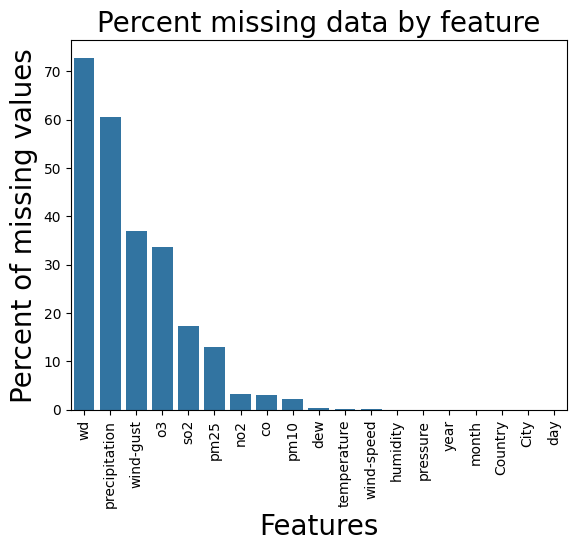

In [ ]:
# Anteil missing values in percent als Barplot (nicht aufgehübscht, weil nur für uns hier relevant)

sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=20)
plt.title('Percent missing data by feature', fontsize=20)
plt.xticks(rotation=90);

/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_43702/1483834678.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_city = df_eda.groupby('City').apply(lambda x: x.isnull().sum())


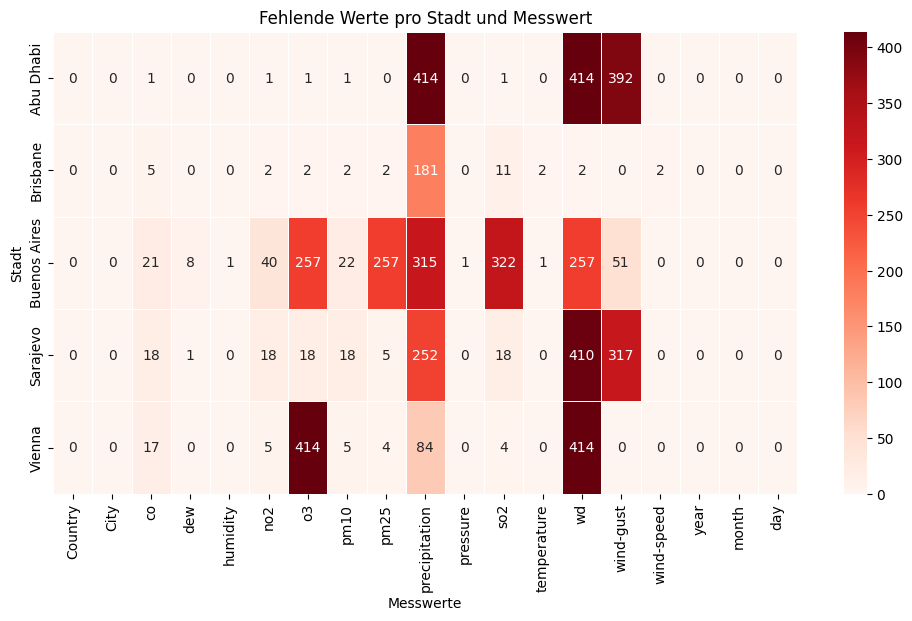

In [33]:
# Missing values by city, mit Heatmap

missing_by_city = df_eda.groupby('City').apply(lambda x: x.isnull().sum())
missing_by_city_percent = missing_by_city / len(df_eda) * 100  # Prozentsatz der fehlenden Werte

missing_by_city_percent

plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_city, cmap="Reds", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Fehlende Werte pro Stadt und Messwert")
plt.xlabel("Messwerte")
plt.ylabel("Stadt")
plt.xticks(rotation=90)
plt.show()


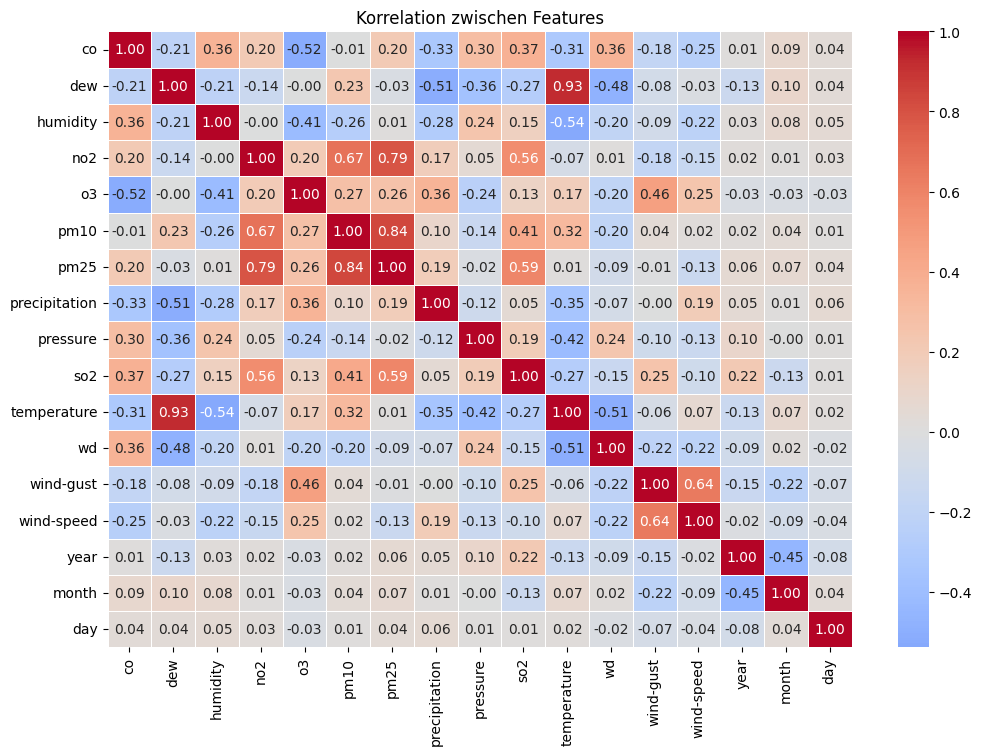

In [ ]:
# Gibt es Korrelationen zwischen den Features (Collinearity)

# Heatmap: Wert über 0.8 = starke Korrelation
# Wert zwischen 0.5 und 0.8 = moderate Korrelation
# Wert unter 0.5 = schwache Korrelation

# Korrelationsmatrix berechnen
corr_matrix = df_eda.select_dtypes(include=['number']).corr()

# Heatmap der Korrelationen
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Korrelation zwischen Features");

# Ergebnis:
# Eine starke Koorrelation gibt es zwischen den Werten für PM10 und PM25. Beide Werte messen die Feinstaubbelastung.
# Außerdem gibt es eine moderate Korrelation zwischen den Werten für NO2 und O3. NO2 ist ein Vorläufer von O3.
# Die Korrelation zwischen den werten für Dew und Temperature ist mit 0.93 sehr hoch.

# Nils: Der parameter "center" in sns.heatmap() sorgt dafür, dass die Farbskala bei 0 zentriert ist. 
# Das muss hier sein weil wir ja positive und negative Korrelationen haben. Sonst wäre die Farbskala nicht symmetrisch um 0.
# Bei der Heatmap zu den Fehlenden Werten ist das nicht so wichtig, weil es ja nur um die Anzahl der fehlenden Werte geht.





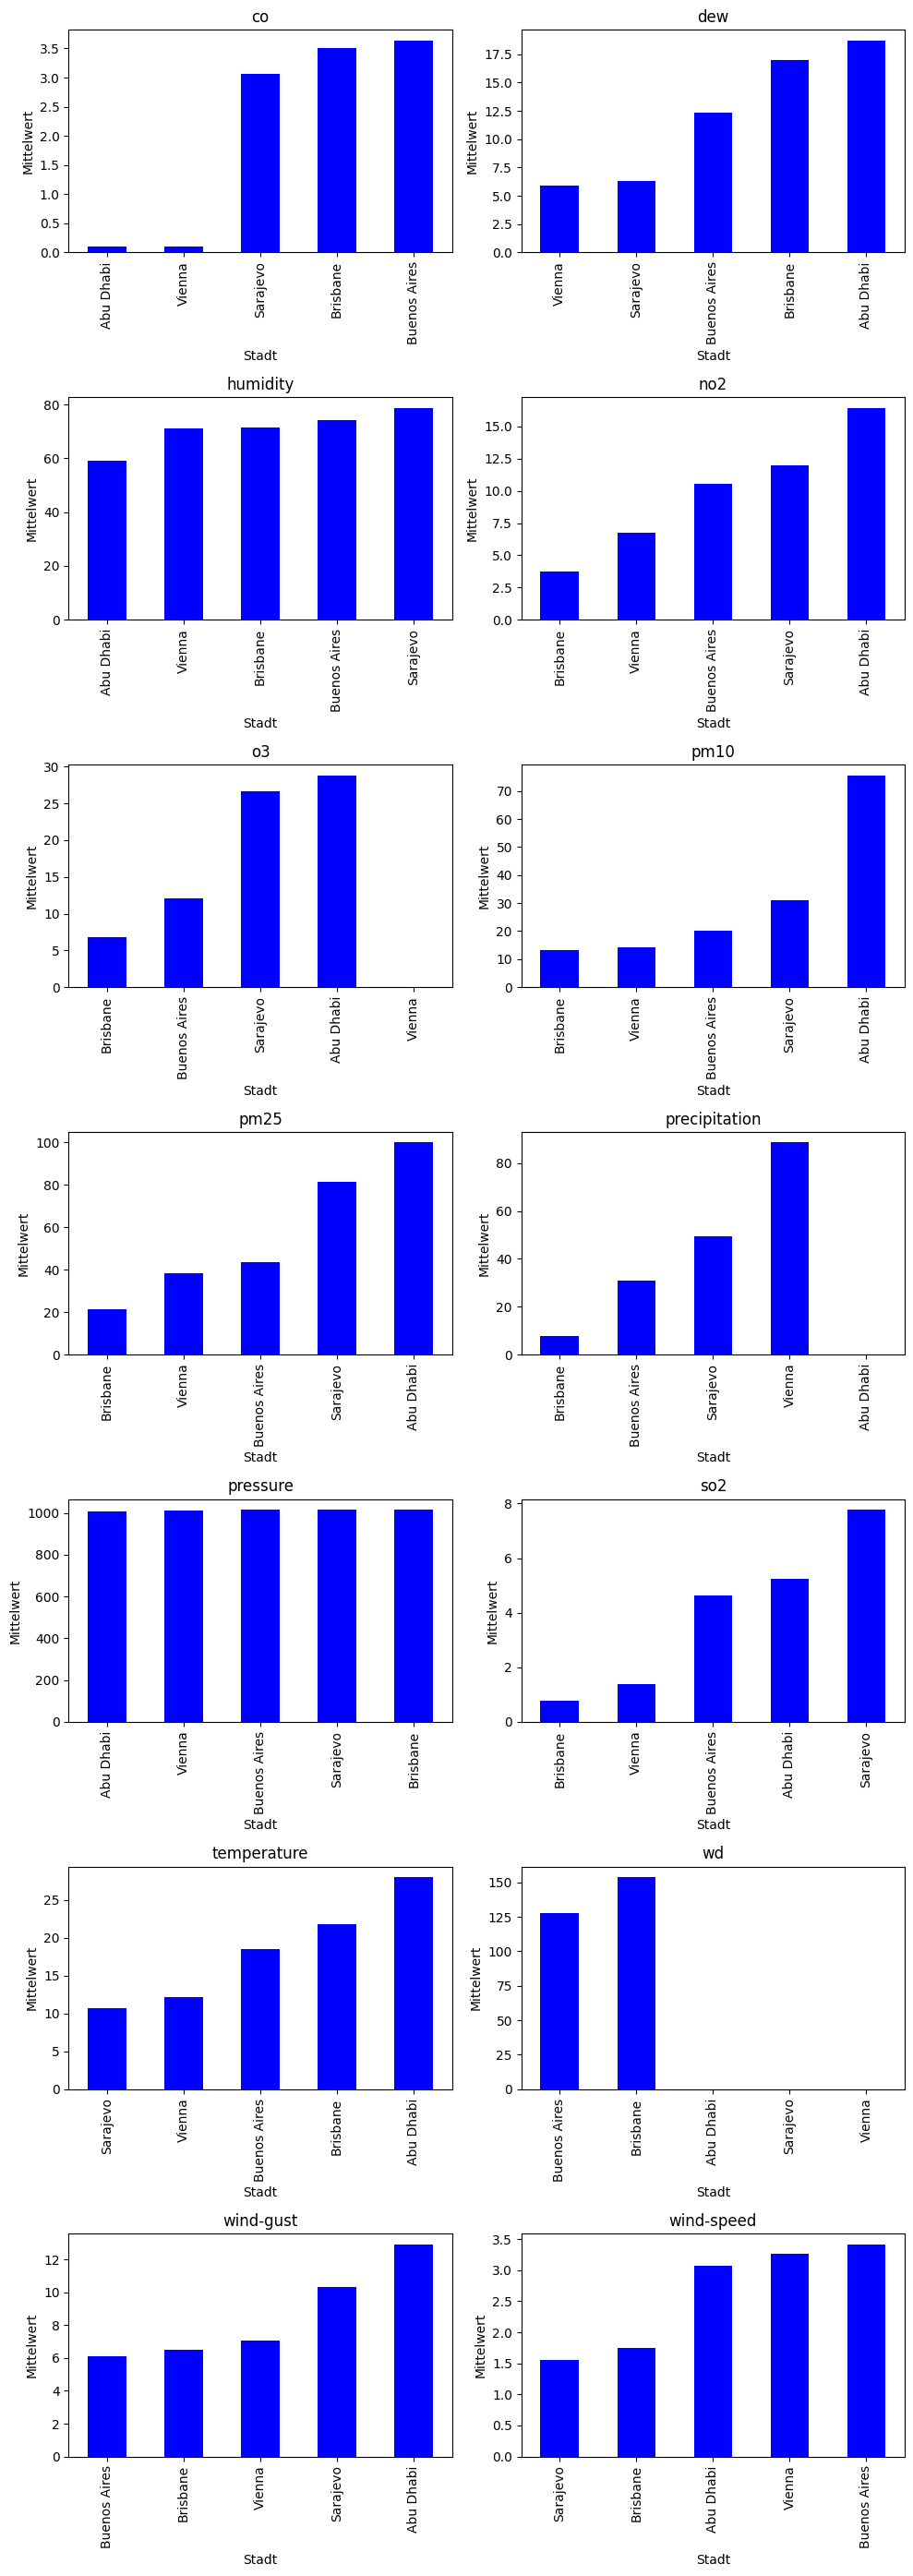

In [ ]:
# Alle Features (Schadstoff, Wetter; pro Stadt) in einem Plot:
# Welche Stadt hat die höchsten Werte für die verschiedenen Features?

# Features = Alle Features außer 'Country', 'City', 'year', 'month', 'day'
pollutants = [col for col in df_eda.columns if col not in ['Country', 'City', 'year', 'month', 'day']]

# Subplot-Anzahl automatisch bestimmen (hier 2 Spalten, dynamische Zeilen)
ncols = 2
nrows = (len(pollutants) + ncols - 1) // ncols  # Rundet nach oben auf

# Figure und Subplots erstellen
fig, axes = plt.subplots(nrows, ncols, figsize=(10, nrows * 4))  # Dynamische Höhe

# Falls nur eine Zeile existiert, wird `axes` zu einem 1D-Array → absichern
if nrows == 1:
    axes = [axes]

# Plots generieren
for i, pollutant in enumerate(pollutants):
    ax = axes[i // ncols][i % ncols]  # Richtige Position im Grid bestimmen
    df_eda[[pollutant, 'City']].groupby("City").mean().sort_values(by=pollutant).head(20).plot.bar(ax=ax, color='b')
    ax.set_title(pollutant)
    ax.set_xlabel("Stadt")
    ax.set_ylabel("Mittelwert")
    
    # Legende entfernen
    ax.legend().remove()

# Leere Subplots ausblenden, falls ungerade Anzahl
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j // ncols][j % ncols])

plt.tight_layout();


# Ergebnis:
# Pressure liegt überall bei 1000. Der Maßstab im Diagramm ist zu grob.
# Dew und Temperature sind sehr stark korreliert. PCA-Kandidaten?
# PM10 und PM25 sind stark korreliert. PCA-Kandidaten?
